<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Preprocesamiento de Datos para un Modelo de Clasificación

Nuestro equipo de riesgo ha identificado la necesidad de construir un modelo de clasificación para detectar transacciones potencialmente fraudulentas o anómalas. El éxito de este modelo permitirá identificar patrones en los datos y reducir pérdidas económicas para nuestros clientes y la empresa. Tu trabajo para hoy será preparar los datos proporcionados para desarrollar un modelo de clasificación que prediga la probabilidad de que una transacción sea “Normal” o “Anómala”, basándose en las características de las transacciones. Dentro de las tareas que tienes que realizar hoy deben estar incluidas las siguientes: 


1. **Análisis exploratorio de datos (EDA):**

   - Visualizar la distribución de las principales variables.

   - Explorar relaciones entre las características y la variable objetivo (`is_fraudulent`).


2. **Limpieza de datos:**

   - Identificar y tratar valores nulos.

   - Eliminar duplicados si existen.

   - Asegurar que las variables tienen el tipo de dato correcto.

   - etc. 

3. **Transformación de variables:**

   - Normalizar o escalar variables numéricas según sea necesario.

   - Codificar variables categóricas con técnicas como One-Hot Encoding, Target Encoding u Ordinal Encoding, según corresponda.

   - Crear variables derivadas útiles, como:

     - Frecuencia de transacciones de cada cliente.

     - Diferencia de tiempo entre transacciones consecutivas.

     - Ratio entre el saldo posterior y el monto de la transacción.

## Datos Proporcionados

El archivo de datos que analizarán contiene transacciones reales registradas por una compañia. A continuación, se describen las principales columnas que deberán preprocesar:

| Columna               | Descripción                                                                                     |
|-----------------------|-------------------------------------------------------------------------------------------------|
| `transaction_id`      | Identificador único de la transacción.                                                         |
| `customer_id`         | Identificador único del cliente que realizó la transacción.                                    |
| `merchant_id`         | Identificador único del comercio donde se realizó la transacción.                              |
| `amount`              | Monto de la transacción (en la moneda correspondiente).                                        |
| `transaction_time`    | Fecha y hora exacta en la que ocurrió la transacción.                                          |
| `is_fraudulent`       | Indicador de si la transacción fue fraudulenta (1: Sí, 0: No).                                 |
| `card_type`           | Tipo de tarjeta utilizada para la transacción (Visa, MasterCard, American Express, Discover).  |
| `location`            | Ubicación (ciudad o región) donde se realizó la transacción.                                   |
| `purchase_category`   | Categoría de la compra (por ejemplo, Gas Station, Online Shopping, Retail, etc.).              |
| `customer_age`        | Edad del cliente en el momento de la transacción.                                              |
| `transaction_description` | Descripción breve de la transacción, usualmente incluye el comercio asociado.              |


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

import sys
sys.path.append("../")

# Importamos las clases creadas para hace el EDA
# -----------------------------------------------------------------------
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_ajuste as sf
from src import soporte_encoding_logistica as se
from src import soporte as sp

# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

In [2]:
# leemos el dataframe
df = pd.read_csv("../data/financial_data.csv", index_col = 0).reset_index(drop=True)
df.head()

,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1082,2027,"5,758.59",2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,1015,2053,"1,901.56",2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,1004,2035,"1,248.86",2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,1095,2037,"7,619.05",2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,1036,2083,"1,890.10",2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [3]:
# llamamos a la función para hacer el análisis exploratorio de datos, para familiarizarnos con la estructura de los datos
sl.exploracion_datos(df)

El número de filas es 10000 y el número de columnas es 10

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Series([], dtype: float64)


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
customer_id,"10,000.00","1,051.27",28.86,"1,001.00","1,026.00","1,052.00","1,076.00","1,100.00"
merchant_id,"10,000.00","2,050.49",28.88,"2,001.00","2,025.00","2,050.00","2,076.00","2,100.00"
amount,"10,000.00","4,958.38","2,899.70",10.61,"2,438.18","4,943.94","7,499.31","9,999.75"
is_fraudulent,"10,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
customer_age,"10,000.00",44.05,15.32,18.00,31.00,44.00,57.00,70.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
transaction_time,10000,10000,2023-01-01 02:46:23,1
card_type,10000,4,Discover,2633
location,10000,50,City-7,223
purchase_category,10000,6,Travel,1694
transaction_description,10000,100,Purchase at Merchant-2016,120



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  int64  
 1   merchant_id              10000 non-null  int64  
 2   amount                   10000 non-null  float64
 3   transaction_time         10000 non-null  object 
 4   is_fraudulent            10000 non-null  int64  
 5   card_type                10000 non-null  object 
 6   location                 10000 non-null  object 
 7   purchase_category        10000 non-null  object 
 8   customer_age             10000 non-null  int64  
 9   transaction_description  10000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB


None

In [4]:
df.drop(columns=['transaction_time'], inplace=True)

In [5]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sl.Visualizador(df)

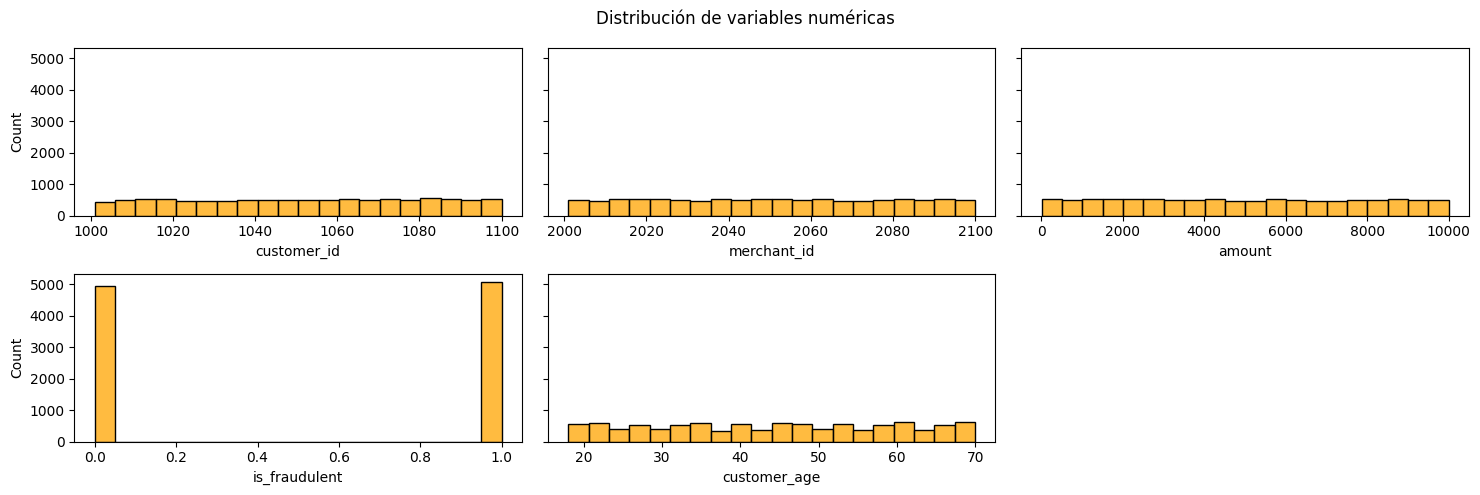

In [6]:
# exploramos la distribución de las variables numéricas
visualizador.plot_numericas(color = "orange")

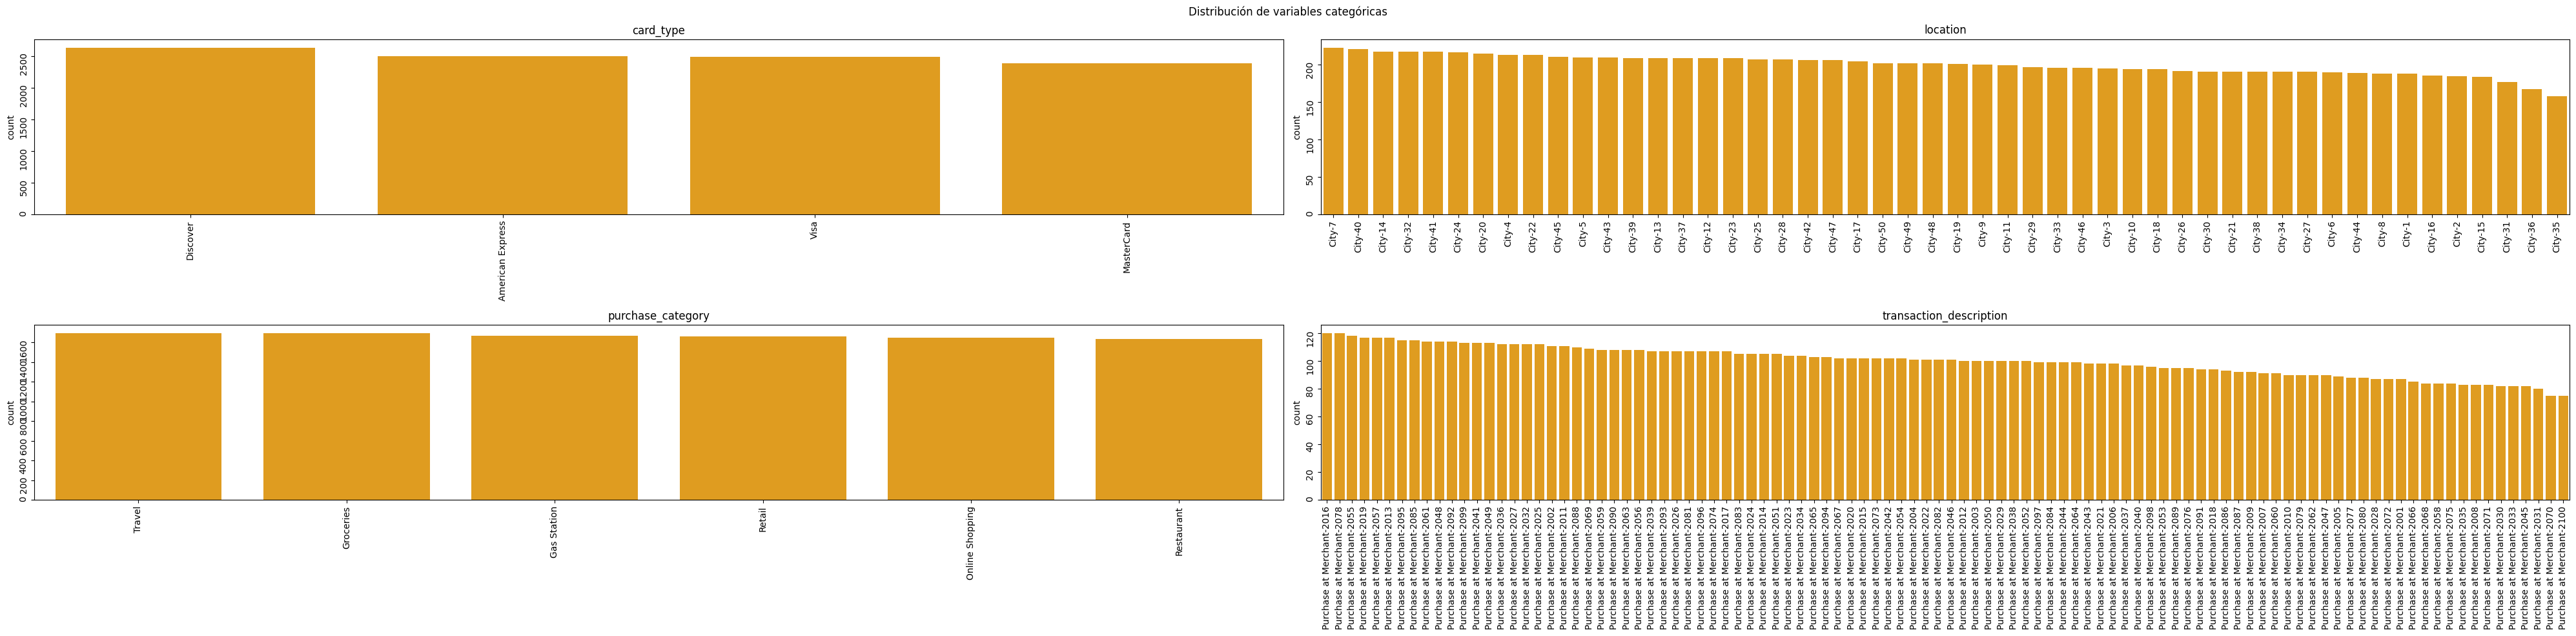

In [7]:
# cambiamos el tipo de la variable "DiscountAvailed"
#df["DiscountsAvailed"] = df["DiscountsAvailed"].astype("category")

# evaluamos la distribución de las variables categóricas
visualizador.plot_categoricas(color = "orange")

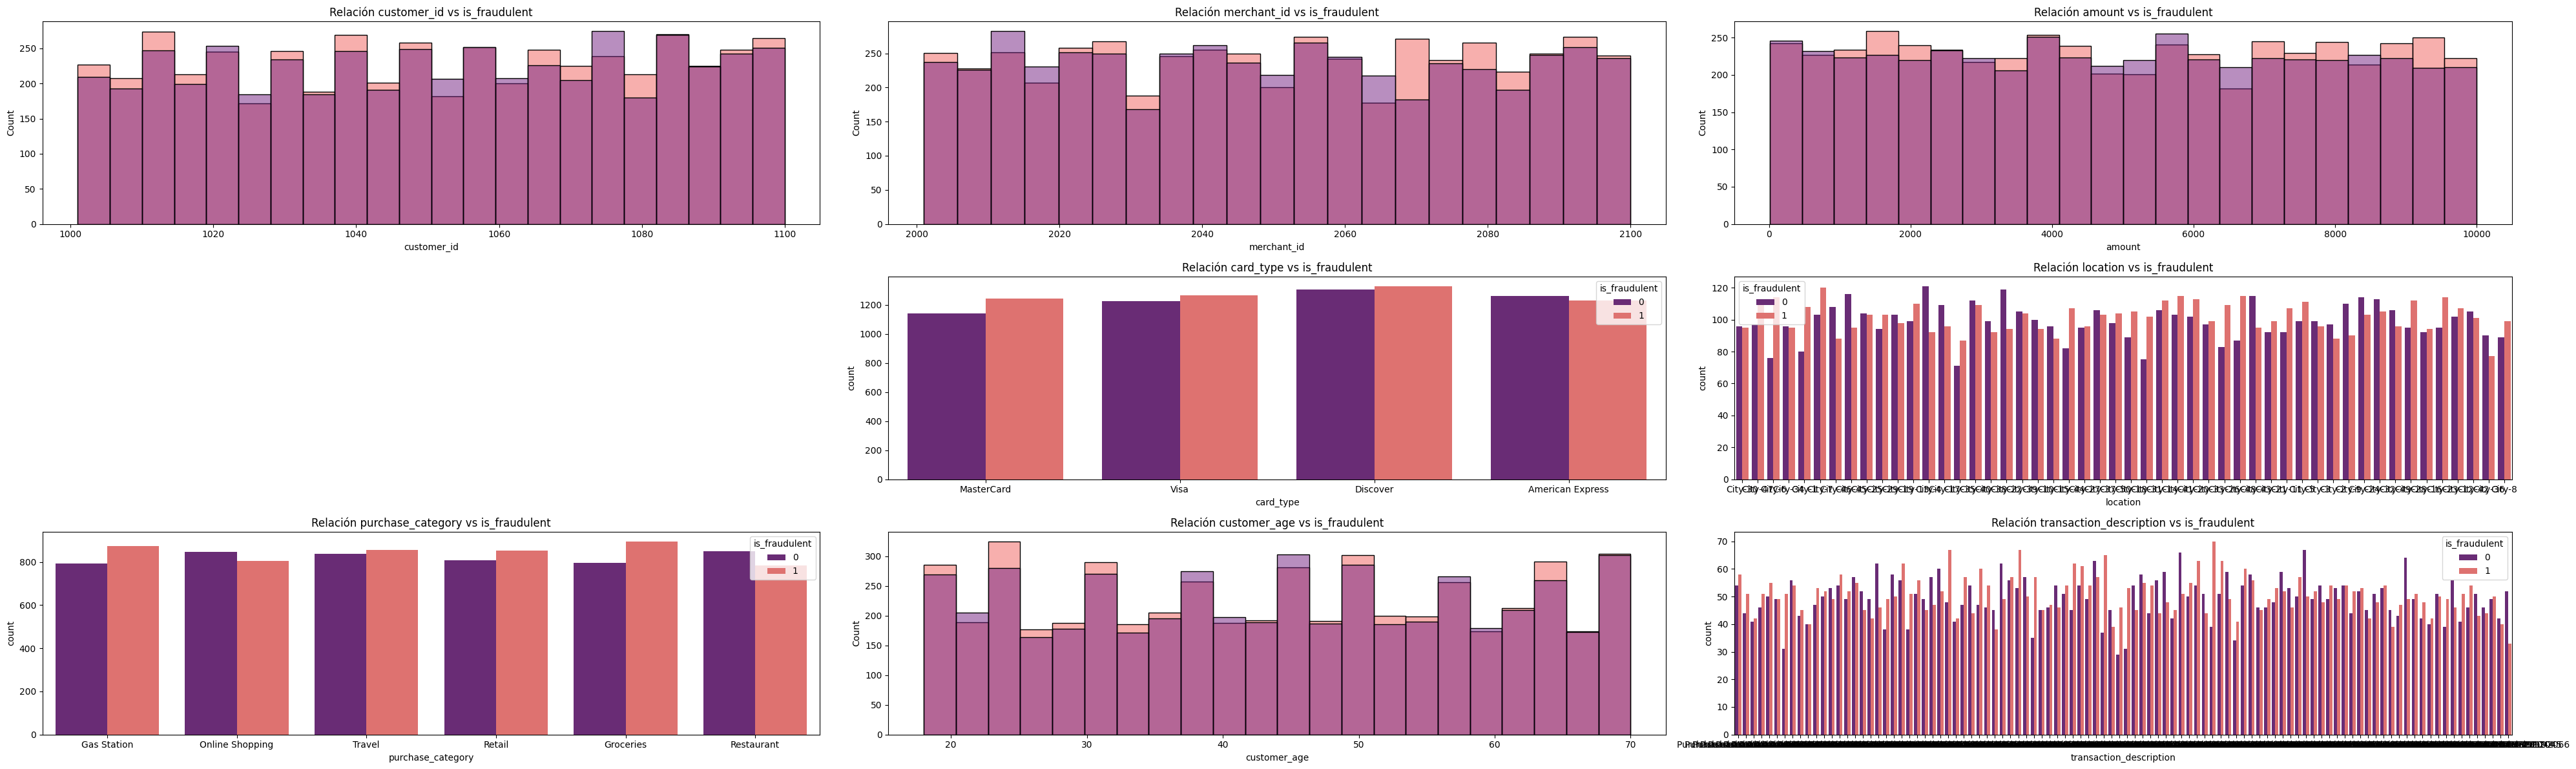

In [8]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "is_fraudulent")

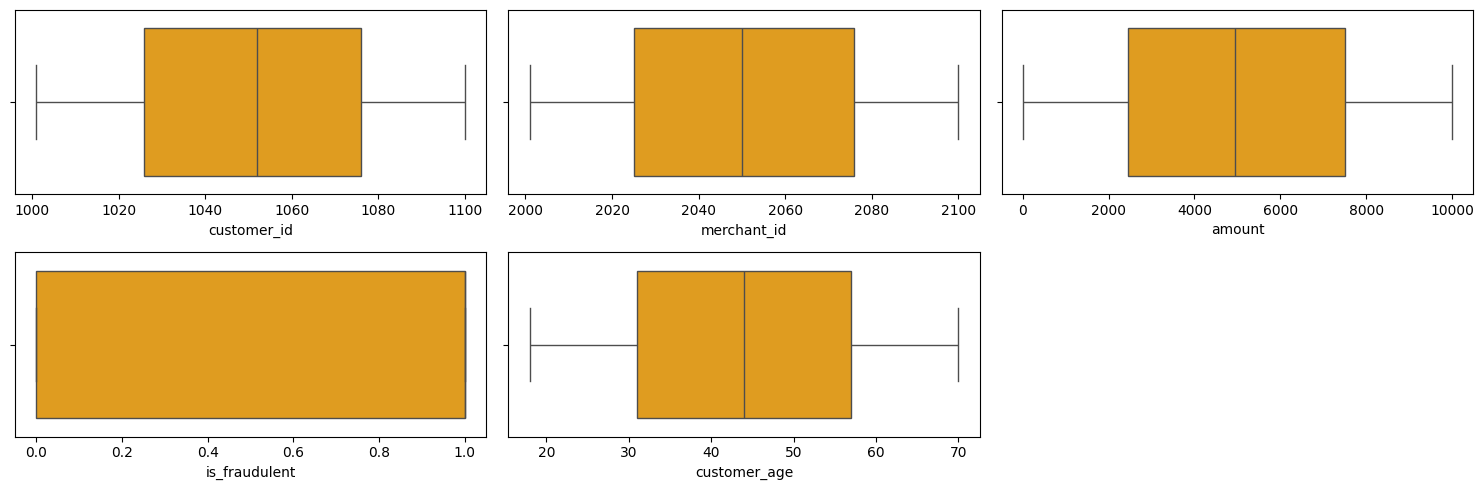

In [9]:
# detectamos los outliers
visualizador.deteccion_outliers(color = "orange")

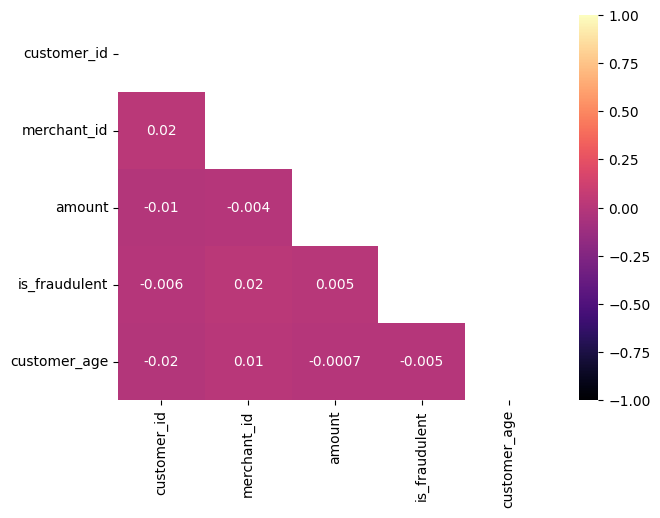

In [10]:
# evaluamos las correlaciones entre las variables numéricas
visualizador.correlacion()

# Preprocesamiento

## *Featuring Scaling*

In [11]:
df["is_fraudulent"] = df["is_fraudulent"].astype("object")

In [12]:
# Instanciamos la clase de Escalado
df = sp.standar_datos(df, df.select_dtypes(include = np.number).columns)
df.head()

,customer_id,merchant_id,amount,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description,customer_id_robust,merchant_id_robust,amount_robust,customer_age_robust,customer_id_min_max,merchant_id_min_max,amount_min_max,customer_age_min_max,customer_id_norm,merchant_id_norm,amount_norm,customer_age_norm,customer_id_estandar,merchant_id_estandar,amount_estandar,customer_age_estandar
0,1082,2027,"5,758.59",0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027,0.60,-0.45,0.16,-0.04,0.82,0.26,0.58,0.48,0.17,0.33,0.93,0.01,1.06,-0.81,0.28,-0.07
1,1015,2053,"1,901.56",1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053,-0.74,0.06,-0.60,0.65,0.14,0.53,0.19,0.83,0.34,0.69,0.64,0.02,-1.26,0.09,-1.05,1.11
2,1004,2035,"1,248.86",1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035,-0.96,-0.29,-0.73,0.50,0.03,0.34,0.12,0.75,0.39,0.79,0.48,0.02,-1.64,-0.54,-1.28,0.85
3,1095,2037,"7,619.05",1,Discover,City-6,Travel,59,Purchase at Merchant-2037,0.86,-0.25,0.53,0.58,0.95,0.36,0.76,0.79,0.14,0.26,0.96,0.01,1.52,-0.47,0.92,0.98
4,1036,2083,"1,890.10",1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083,-0.32,0.65,-0.60,-0.31,0.35,0.83,0.19,0.35,0.35,0.69,0.63,0.01,-0.53,1.13,-1.06,-0.53


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,"10,000.00","1,051.27",28.86,"1,001.00","1,026.00","1,052.00","1,076.00","1,100.00"
merchant_id,"10,000.00","2,050.49",28.88,"2,001.00","2,025.00","2,050.00","2,076.00","2,100.00"
amount,"10,000.00","4,958.38","2,899.70",10.61,"2,438.18","4,943.94","7,499.31","9,999.75"
customer_age,"10,000.00",44.05,15.32,18.00,31.00,44.00,57.00,70.00
customer_id_robust,"10,000.00",-0.01,0.58,-1.02,-0.52,0.00,0.48,0.96
merchant_id_robust,"10,000.00",0.01,0.57,-0.96,-0.49,0.00,0.51,0.98
amount_robust,"10,000.00",0.00,0.57,-0.97,-0.50,0.00,0.50,1.00
customer_age_robust,"10,000.00",0.00,0.59,-1.00,-0.50,0.00,0.50,1.00
customer_id_min_max,"10,000.00",0.51,0.29,0.00,0.25,0.52,0.76,1.00
merchant_id_min_max,"10,000.00",0.50,0.29,0.00,0.24,0.49,0.76,1.00


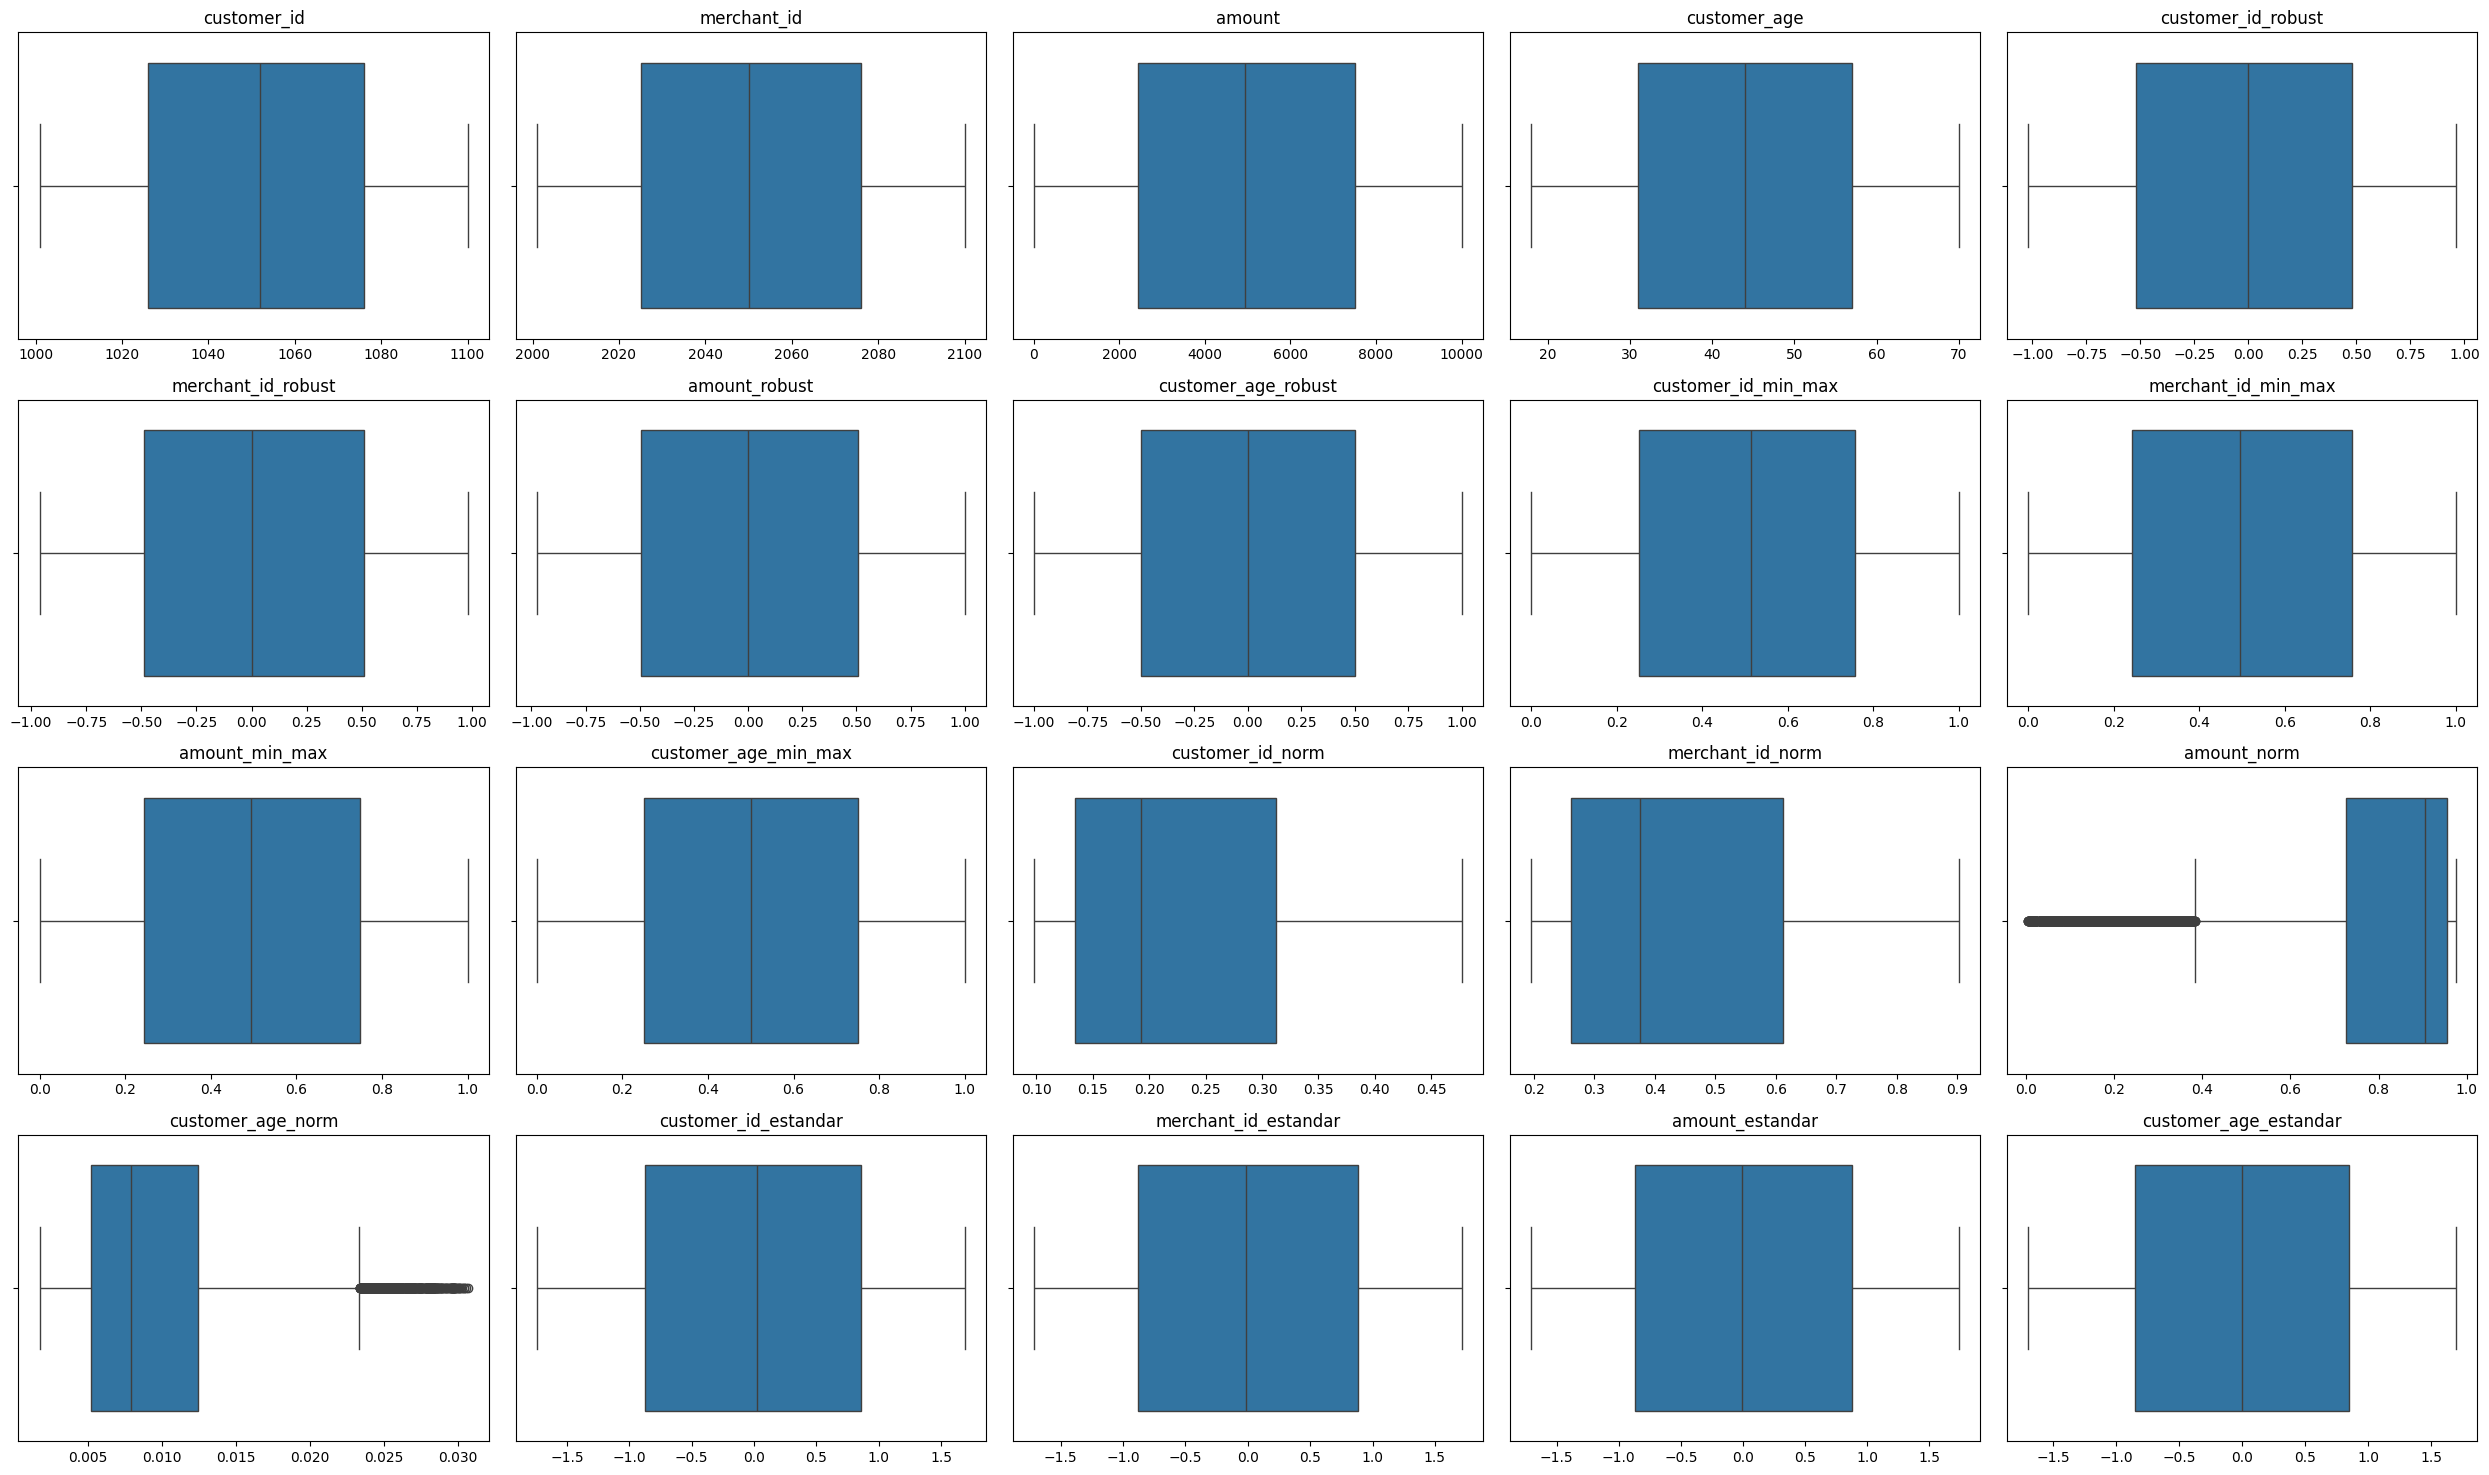

In [14]:
sp.visualizar_tablas(df, df.select_dtypes(include = np.number).columns)

In [ ]:
df.columns

In [ ]:
df = df.drop(['propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'municipality', 'status', 'newDevelopment', 'floor',
       'district', 'neighborhood', 'hasLift', 'hasParkingSpace', 'typology',
       'subTypology', 'priceByArea', 'propertyType_robust', 'operation_robust',
       'size_robust', 'exterior_robust', 'rooms_robust', 'bathrooms_robust',
       'municipality_robust', 'status_robust', 'newDevelopment_robust',
       'floor_robust', 'district_robust', 'neighborhood_robust',
       'hasLift_robust', 'hasParkingSpace_robust', 'typology_robust',
       'subTypology_robust', 'priceByArea_robust', 'propertyType_min_max',
       'operation_min_max', 'size_min_max', 'exterior_min_max',
       'rooms_min_max', 'bathrooms_min_max', 'municipality_min_max',
       'status_min_max', 'newDevelopment_min_max', 'floor_min_max',
       'district_min_max', 'neighborhood_min_max', 'hasLift_min_max',
       'hasParkingSpace_min_max', 'typology_min_max', 'subTypology_min_max',
       'priceByArea_min_max', 'propertyType_estandar', 'operation_estandar',
       'size_estandar', 'exterior_estandar', 'rooms_estandar',
       'bathrooms_estandar', 'municipality_estandar', 'status_estandar',
       'newDevelopment_estandar', 'floor_estandar', 'district_estandar',
       'neighborhood_estandar', 'hasLift_estandar', 'hasParkingSpace_estandar',
       'typology_estandar', 'subTypology_estandar', 'priceByArea_estandar'], axis=1)

## Codificación Variables Categóricas

IndexError: index 24 is out of bounds for axis 0 with size 24

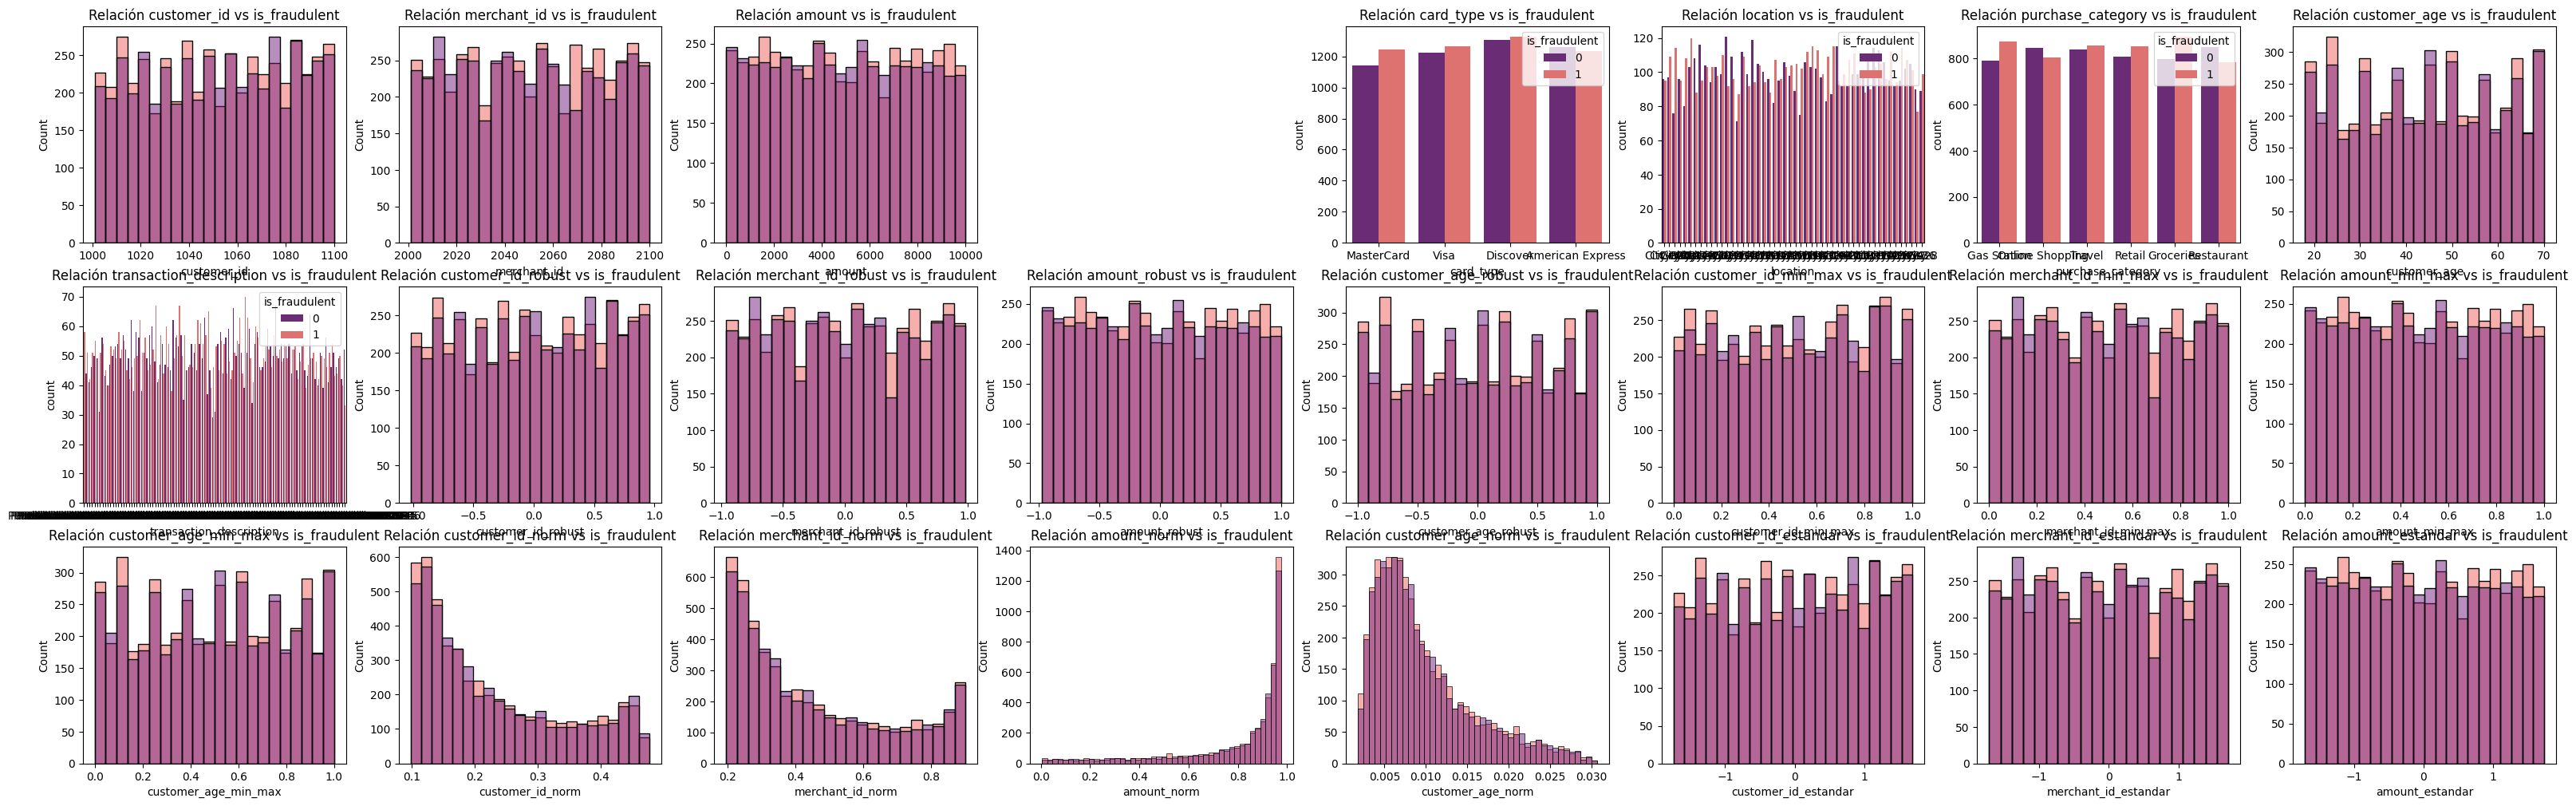

In [15]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "is_fraudulent")

In [ ]:
df["is_fraudulent"] = df["is_fraudulent"].astype("float")

In [ ]:
# sacamos la lista de columnas categóricas
lista_col_categ = df.select_dtypes(include = ["O", "category"])

for columna in lista_col_categ:

    print(f"Analizando la relación entre is_fraudulent y {columna.upper()}")
    # Inicializar la clase
    analisis_chi2 = se.AnalisisChiCuadrado(df, variable_predictora = columna, variable_respuesta = 'is_fraudulent')

    # Generar la tabla de contingencia
    tabla_contingencia = analisis_chi2.generar_tabla_contingencia()

    # Realizar la prueba de Chi-cuadrado
    resultado_chi2 = analisis_chi2.realizar_prueba_chi_cuadrado()

    print("\n ##################################### \n")

In [ ]:
# diccionario_encoding = { "target": ['LoyaltyProgram', "DiscountsAvailed" ] , 
#                         "onehot": ["Gender", "ProductCategory"]} 
# # En caso de que queramos aplicar el método solo a una columna
# encoding = se.Encoding(df, variable_respuesta="PurchaseStatus", diccionario_encoding=diccionario_encoding)
# df = encoding.one_hot_encoding()
# df = encoding.target_encoding()
# df.head()